# Data Warehousing and Data Mining

## Labs

### Prepared by Gilroy Gordon

#### Contact Information

SCIT ext. 3643

ggordonutech@gmail.com

gilroy.gordon@utech.edu.jm

### Week 5 - Neural Networks in Python


Additional Reference Resources:

http://scikit-learn.org/stable/modules/neural_networks_supervised.html

Objectives
----
---
     > Data Preprocessing
          > Min Max Scaling
     > Data Transformation
     > Data Mining
          > Neural Networks (Classification and Estimation)
     > Model Evaluation and Prediction
          > Train/Test Split - 70/30
     > Presentation
          > Plots
    

## Import required libraries and acquire data

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = './data/hr_data.csv' # Path to data file
data = pd.read_csv(data_path) 
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# What columns are in the data set ? Do they have spaces that I should consider
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

## Aim: Can we determine a person's `Satisfaction Level` based on the other factors?

satisfaction_level = a(last_evaluation) + b(number_project) + c(average_montly_hours) + d(time_spend_company)

The coefficients a-d, what are they? What is the relationship between the variables? Does multicolinearity exist?

I have created a function below ```create_label_encoder_dict``` to assist with this. The function accepts a dataframe object and uses the ```LabelEncoder``` class from ```sklearn.preprocessing``` to encode (dummy encoding) or transform non-numerical columns to numbers. Finally it returns a dictionary object of all the encoders created for each column.

The LabelEncoder is a useful resource as it not only automatically transforms all values in a column but also keeps a track of what values were transformed from. i.e. It will change all ```Female``` to ```0``` and all ```Male``` to ```1```

In [4]:
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    
    label_encoder_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Age':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [5]:
label_encoders = create_label_encoder_dict(data)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
    print("="*32)
    print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
    print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(sales) = ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
             Encoded Values
IT                        0
RandD                     1
accounting                2
hr                        3
management                4
marketing                 5
product_mng               6
sales                     7
support                   8
technical                 9
Encoder(salary) = ['high' 'low' 'medium']
        Encoded Values
high                 0
low                  1
medium               2


In [6]:
# Apply each encoder to the data set to obtain transformed values
data2 = data.copy() # create copy of initial data set
for column in data2.columns:
    if column in label_encoders:
        data2[column] = label_encoders[column].transform(data2[column])

print("Transformed data set")
print("="*32)
data2.head(15)

Transformed data set


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1
6,0.10,0.77,6,247,4,0,1,0,7,1
7,0.92,0.85,5,259,5,0,1,0,7,1
8,0.89,1.00,5,224,5,0,1,0,7,1
9,0.42,0.53,2,142,3,0,1,0,7,1


In [7]:
# separate our data into dependent (Y) and independent(X) variables
X_data = data2[['last_evaluation','number_project','average_montly_hours','time_spend_company']]
Y_data = data2['satisfaction_level']

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30) 

In [9]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [10]:
# Create an instance of linear regression
reg = MLPRegressor()

In [11]:
reg.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [12]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear unit funct

In [18]:
reg.n_layers_ # Number of layers utilized 

3

In [20]:
# Make predictions using the testing set
test_predicted = reg.predict(X_test)
test_predicted

array([0.66908448, 0.65429664, 0.60327367, ..., 0.47367503, 0.72666922,
       0.57838912])

In [21]:
data3 = X_test.copy()
data3['predicted_satisfaction_level']=test_predicted
data3['satisfaction_level']=y_test
data3.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,predicted_satisfaction_level,satisfaction_level
6335,0.81,5,143,2,0.669084,0.80
7020,0.73,3,138,3,0.654297,0.62
8864,0.56,3,142,3,0.603274,0.81
7454,0.57,4,141,3,0.577754,0.49
13361,0.61,4,118,5,0.541316,0.54


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# The mean squared error don't worry guys we can do this
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predicted))

Mean squared error: 0.06


In [25]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, test_predicted))

Variance score: 0.07


# Preprocessing 

In [30]:
def create_min_max_scaler_dict(df):
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler_dict = {}
    for column in df.columns:
        # Only create encoder for categorical data types
        if np.issubdtype(df[column].dtype, np.number):
            min_max_scaler_dict[column]= MinMaxScaler().fit(pd.DataFrame(df[column]))
    return min_max_scaler_dict

In [31]:
min_max_scalers = create_min_max_scaler_dict(data)
print("Min Max Values for each Label")
print("="*32)
min_max_scalers

Min Max Values for each Label


{'Work_accident': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'average_montly_hours': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'last_evaluation': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'left': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'number_project': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'promotion_last_5years': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'satisfaction_level': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'time_spend_company': MinMaxScaler(copy=True, feature_range=(0, 1))}

In [48]:
#retrieving a scacler
time_spend_company_scaler=min_max_scalers['time_spend_company']

In [49]:
time_spend_company_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [50]:
time_spend_company_scaler.data_max_ #Maximum value 

array([10.])

In [51]:
time_spend_company_scaler.data_min_ # Minimum value

array([2.])

In [52]:
time_spend_company_scaler.data_range_ # Range = Max- Min

array([8.])

In [53]:
pd.DataFrame([
    {
        'column':col,
        'min':min_max_scalers[col].data_min_[0], 
        'max':min_max_scalers[col].data_max_[0], 
        'range':min_max_scalers[col].data_range_[0] }  for col in min_max_scalers])

,column,max,min,range
0,promotion_last_5years,1,0.00,1.00
1,time_spend_company,10,2.00,8.00
2,number_project,7,2.00,5.00
3,left,1,0.00,1.00
4,last_evaluation,1,0.36,0.64
5,average_montly_hours,310,96.00,214.00
6,satisfaction_level,1,0.09,0.91
7,Work_accident,1,0.00,1.00


In [55]:
# Apply each scaler to the data set to obtain transformed values
data3 = data2.copy() # create copy of initial data set
for column in data3.columns:
    if column in min_max_scalers:
        data3[column] = min_max_scalers[column].transform(pd.DataFrame(data3[column]))

print("Transformed data set")
print("="*32)
data3.head(15)

Transformed data set


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0,1,0,7,1
1,0.780220,0.781250,0.6,0.775701,0.500,0,1,0,7,2
2,0.021978,0.812500,1.0,0.822430,0.250,0,1,0,7,2
3,0.692308,0.796875,0.6,0.593458,0.375,0,1,0,7,1
4,0.307692,0.250000,0.0,0.294393,0.125,0,1,0,7,1
5,0.351648,0.218750,0.0,0.266355,0.125,0,1,0,7,1
6,0.010989,0.640625,0.8,0.705607,0.250,0,1,0,7,1
7,0.912088,0.765625,0.6,0.761682,0.375,0,1,0,7,1
8,0.879121,1.000000,0.6,0.598131,0.375,0,1,0,7,1
9,0.362637,0.265625,0.0,0.214953,0.125,0,1,0,7,1


In [56]:
data3.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [57]:
# separate our data into dependent (Y) and independent(X) variables
X2_data = data3[['last_evaluation','number_project','average_montly_hours','time_spend_company']]
Y2_data = data3['satisfaction_level']

## 70/30 Train Test Split

We will split the data using a 70/30 split. i.e. 70% of the data will be randomly chosen to train the model
and 30% will be used to evaluate the model

In [58]:
from sklearn.model_selection import train_test_split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_data, Y2_data, test_size=0.30) 

In [60]:
# Create an instance of linear regression
reg2 = MLPRegressor()
reg2.fit(X2_train,y2_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
reg2.n_layers_

3

In [63]:
# Make predictions using the testing set
test2_predicted = reg2.predict(X2_test)
test2_predicted

array([0.57568627, 0.57893697, 0.5534623 , ..., 0.55752807, 0.71729991,
       0.58278402])

In [64]:
# The mean squared error don't worry guys we can do this
print("Mean squared error: %.2f" % mean_squared_error(y2_test, test2_predicted))

Mean squared error: 0.05


## Hooray, we improved by approximately 0.01

## Let's Visualize using a Residual Plot

In [65]:
import seaborn as sns
sns.set(style="whitegrid")

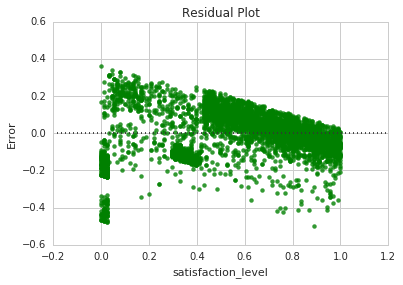

In [71]:
sns.residplot(y2_test, test2_predicted,  color="g")
plt.title("Residual Plot")
plt.ylabel("Error")

## Did you try changing the amount of hidden layers??